# Kilka słów o klasach i obiektach

* W Pythonie, jak w wielu innych językach programowania, obiektowość jest kluczowym konceptem, który pomaga zorganizować i zarządzać kodem w sposób przejrzysty i modularny. 
* Często będziesz korzystać z istniejących klas w różnych bibliotekach i modułach.

### Czym są **klasy**?

**Klasa** to pewien **schemat** lub **szablon**, który definiuje **strukturę** i **zachowanie** obiektów. 

Można ją porównać do planu budynku – nie jest to sam budynek, ale zawiera wszystkie szczegóły, które opisują, jak taki budynek powinien wyglądać i działać.

Na przykład, wyobraź sobie klasę `Car`, która może reprezentować ogólny koncept samochodu. 
Klasa ta mogłaby zawierać takie informacje jak kolor samochodu, jego marka oraz metody, które opisują zachowanie, takie jak jazda czy hamowanie.


### Obiekty

**Obiekt** to konkretna instancja klasy. Jeśli klasa jest planem, obiekt jest faktycznym budynkiem zbudowanym według tego planu. Obiekty mają konkretne wartości dla właściwości zdefiniowanych przez klasę.

Na przykład, jeśli mamy klasę `Car`, obiektami mogą być poszczególne samochody: jeden może być czerwony, marki Toyota, a drugi niebieski, marki Ford. Każdy z tych samochodów jest obiektem klasy `Car`.

### Metody

**Metoda** to funkcja zdefiniowana w klasie, która opisuje zachowanie obiektów tej klasy. Metody pozwalają na wykonywanie akcji lub modyfikowanie stanu obiektów.

Dla klasy `Car` metody mogą obejmować:
- `start_engine()`: uruchamia silnik,
- `stop_engine()`: wyłącza silnik,
- `accelerate()`: przyspiesza samochód.

### Korzystanie z klas i obiektów

Podczas programowania będziesz często korzystać z gotowych klas, które zostały stworzone przez innych programistów. Przykłady takich klas to:
- Klasy reprezentujące daty (`datetime`),
- Klasy do pracy z plikami (`Path` z modułu `pathlib`),
- Klasy do pracy z danymi (np. `DataFrame` z pandas).

Każda z tych klas ma swoje metody i właściwości, które są dokumentowane w odpowiednich bibliotekach lub modułach. Twoje zadanie jako programisty będzie polegało na zrozumieniu, jak te klasy działają i jak korzystać z ich funkcjonalności w swoim kodzie.

## Kiedy korzystamy z klas i obiektów w Data Science?

Klasy pozwalają nam zdefiniować pewną strukturę, którą np. chcemy żeby posiadały dane z którymi pracujemy. 

Jako przykład pracy z klasami i obiektami poznamy bibliotekę Pythona zwaną `pydantic`.

Biblioteka ta stanowi w tej chwili niejako standard, tego jak definiować strukturę danych. 

Rozważmy następujący rachunek za gaz:

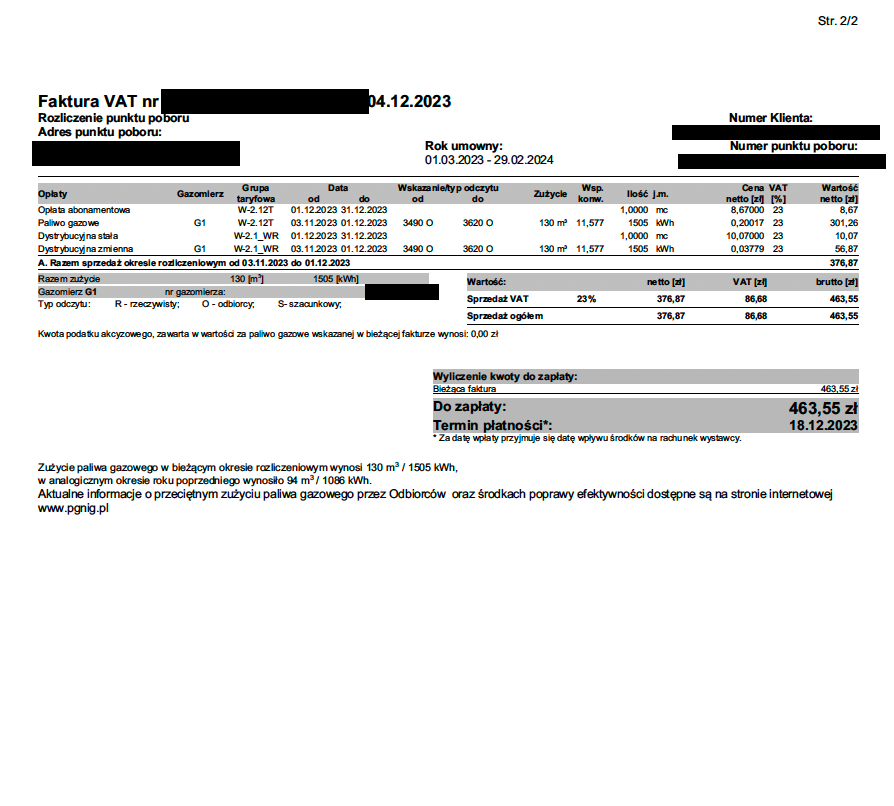

Chcielibyśmy stworzyć klasę która reprezentuję strukturę danych, jakie moglibyśmy z takiego rachunku wyciągnąć.

In [ ]:
# ZANIM ZACZNIEMY MUSIMY ZAINSTALOWAĆ PYDANTIC, BYĆ MOŻE BĘDZIEMY MUSIELI ZROBIĆ RESTART KERNELA
!pip install --quiet pydantic

In [ ]:
from pydantic import BaseModel
from datetime import date


# jak rozumieć ten kod:
# 1. BaseModel jest klasą bazową, która pozwala na tworzenie modeli danych
# 2. BaseModel od razu przekazuje naszej nowo utworzonej klasie kilka przydatnych metod
# 3. GazBillInfo definiuje strukturę danych, z którą chcemy pracować
class GasBillInfo(BaseModel):
    okres_rozliczeniowy_od: date
    okres_rozliczeniowy_do: date
    zuzycie_m3: float
    zuzycie_kWh: float
    do_zaplaty: float
    termin_platnosci: date

# teraz możemy tworzyć obiekty klasy GasBillInfo
bill = GasBillInfo(
    okres_rozliczeniowy_od=date(2021, 1, 1),
    okres_rozliczeniowy_do=date(2021, 1, 31),
    zuzycie_m3=100.0,
    zuzycie_kWh=1000.0,
    do_zaplaty=1000.0,
    termin_platnosci=date(2021, 2, 15)
)

# możemy wyświetlić obiekt
bill

In [ ]:
# ale dzięki temu, że nasza klasa dziedziczy po BaseModel, możemy też
# wyświetlić go w formie JSON
print(bill.model_dump_json(indent=2))

In [ ]:
# albo przy użyciu wbudowanych typów danych Pythona
bill.model_dump()